In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Criar o DataFrame com os dados fornecidos
data = pd.DataFrame({
    'pH': [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 6.0, 2.0, 7.5, 4.5, 5.0, 2.8, 8.0],
    'Concentração': ['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída'],
    'Cheiro': ['Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro'],
    'Classe': ['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica']
})


In [3]:
# Codificar as variáveis categóricas
label_encoder = LabelEncoder()
data['Concentração'] = label_encoder.fit_transform(data['Concentração'])
data['Cheiro'] = label_encoder.fit_transform(data['Cheiro'])
data['Classe'] = label_encoder.fit_transform(data['Classe'])  # Codificar a variável de destino

In [4]:
# Separar características e variável de destino
X = data[['pH', 'Concentração', 'Cheiro']]
y = data['Classe']


In [5]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Inicializar e treinar o modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# Fazer predições
y_pred = model.predict(X_test)

In [8]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [9]:
# Exibir os resultados
print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

Acurácia: 1.0
Matriz de Confusão:
[[3 0]
 [0 2]]
Relatório de Classificação:
              precision    recall  f1-score   support

      Básica       1.00      1.00      1.00         3
       Ácida       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



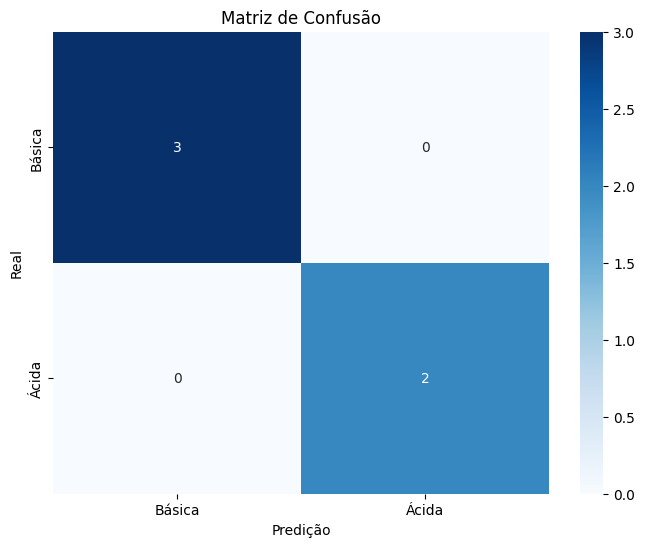

In [10]:
# Plotar a matriz de confusão
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
ax.set_title('Matriz de Confusão')
plt.show()